In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [15]:
def get_file_type(path):
    extension = os.path.splitext(path)[1].lower()

    if extension == '.csv':
        return 'csv'
    elif extension == '.xlsx' or extension == '.xls':
        return 'xlsx'
    elif extension == '.sql':
        return 'sql'
    else:
        return 'unknown'


def read_file(path , extension) :  
    if extension == 'csv':
        df = pd.read_csv(path)
        return df
    elif extension == 'xlsx' or extension == '.xls':
        df = pd.read_excel(path)
        return df
    elif extension == 'sql':
        with open(path, 'r') as sql_file:
            sql_query = sql_file.read()
        db_connection_string = input("Enter your database connection String")
        engine = create_engine(db_connection_string)
        df = pd.read_sql(sql_query, engine)
        return df
    
def preprocess_data(df, handle_duplicates=False):
    # Encoding categorical features
#     df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

   # Handle duplicates
    if handle_duplicates:
        df = df.drop_duplicates()

    # Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

    # Convert date columns to datetime dtype
    date_columns = [col for col in df.columns if 'dte' in col.lower()]
    for col in date_columns:
        df[col] = pd.to_datetime(df[col])
    
    # Encode numerical features
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns
    scaler = MinMaxScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

        
    return df


def visualize_histogram(column_data, column_name , b=20 , c = 'blue' , a = 0.7 ):
    plt.figure(figsize=(10, 6))
    plt.hist(column_data, bins=b, color= c, alpha= a)
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column_name}")
    plt.show()

    
def visualize_pie_chart_plot(column_data, column_name):
    plt.figure(figsize=(10, 6))
    counts = column_data.value_counts()
    counts.index.values.tolist()
    plt.pie(counts , labels=counts.index.values.tolist())
    plt.title(column_name)
    plt.show()
    
def visualize_scatter_plot(x_data, y_data, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"Scatter Plot between {x_label} and {y_label}")
    plt.show()
        
def visulize_columns_according_to_type(df) :
    for col in df.columns :
        if (('int' in str(df[col].dtype)) or ('float' in str(df[col].dtype))) :
            visualize_histogram(df[col] , col)
        elif (df[col].dtype == 'str') or (df[col].dtype == 'object') :
            visualize_pie_chart_plot(df[col] , col)


Enter your file pathC:\\Users\\ELITEBOOK\\Downloads\\archive\\International_Report_Passengers.csv
Your dataframe : 
          data_dte  Year  Month  usg_apt_id usg_apt  usg_wac  fg_apt_id  \
0       05/01/2014  2014      5       14492     RDU       36      11032   
1       06/01/2007  2007      6       13204     MCO       33      16085   
2       12/01/2005  2005     12       11433     DTW       43      10411   
3       04/01/2003  2003      4       13487     MSP       63      16304   
4       12/01/2005  2005     12       12016     GUM        5      11138   
...            ...   ...    ...         ...     ...      ...        ...   
680980  10/01/2015  2015     10       12478     JFK       22      12972   
680981  09/01/2014  2014      9       12478     JFK       22      12972   
680982  10/01/2014  2014     10       12478     JFK       22      12972   
680983  08/01/2014  2014      8       12478     JFK       22      12972   
680984  03/01/1990  1990      3       12478     JFK       2

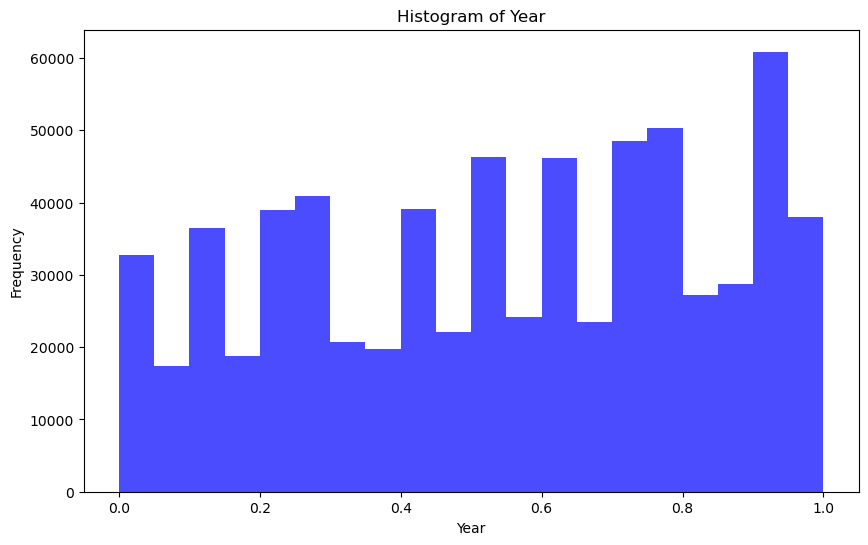

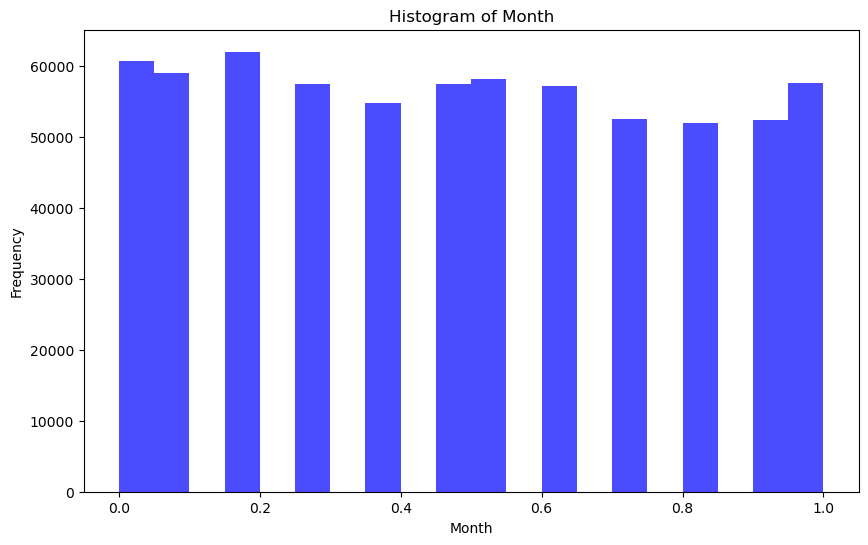

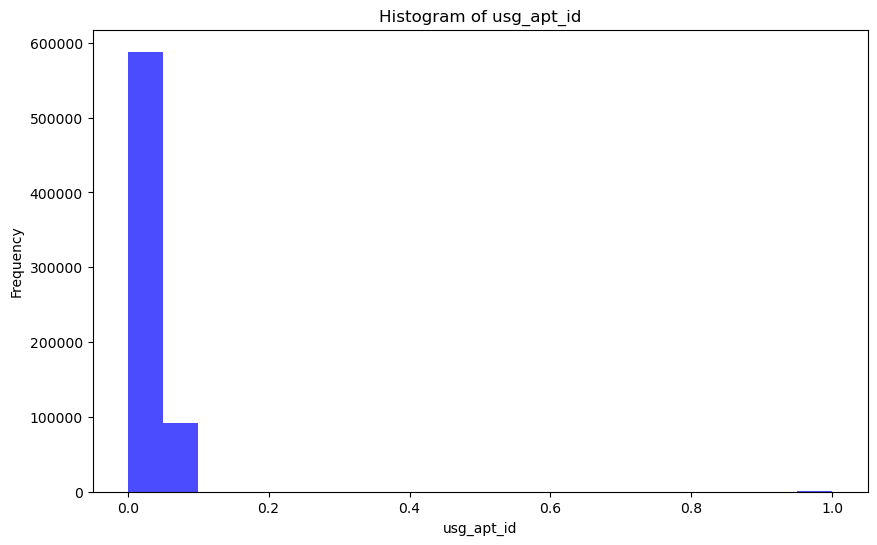

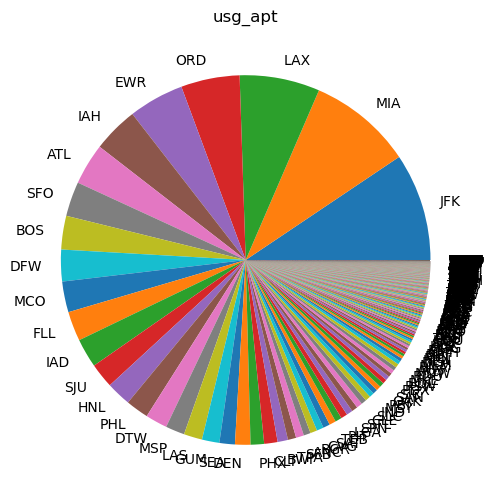

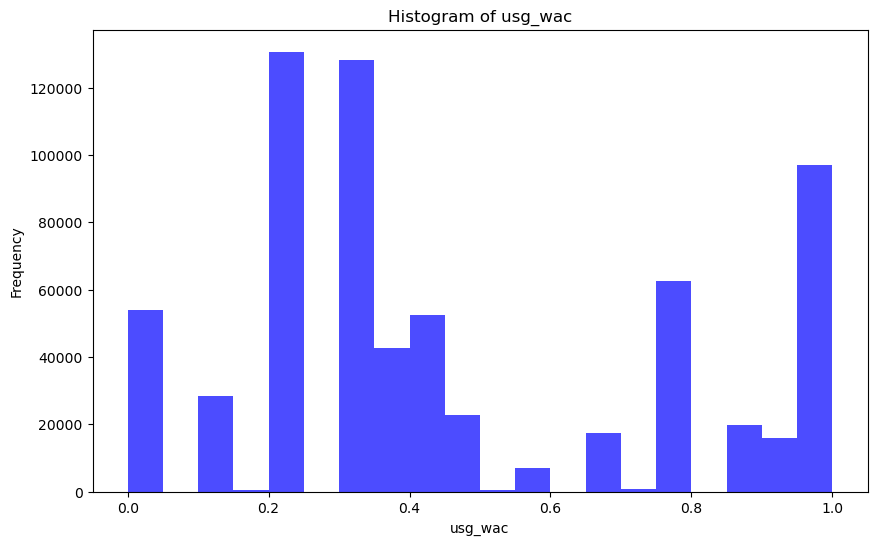

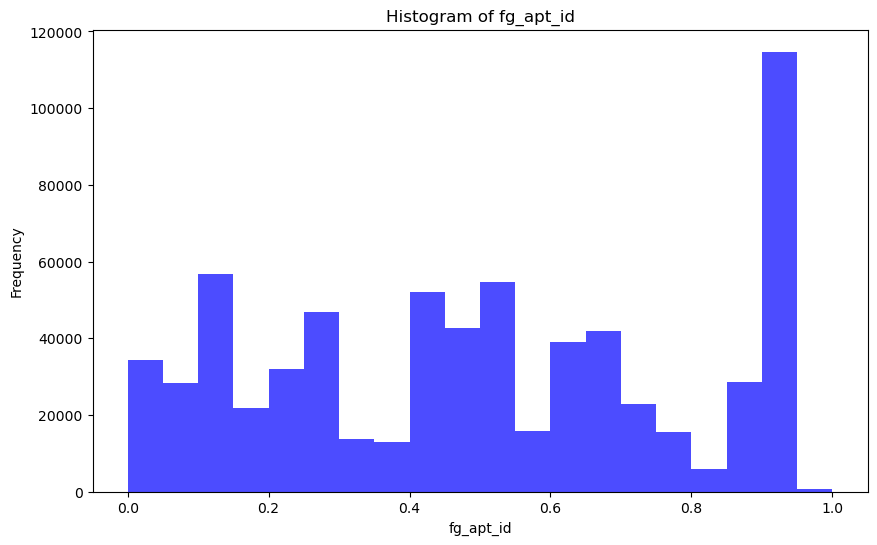

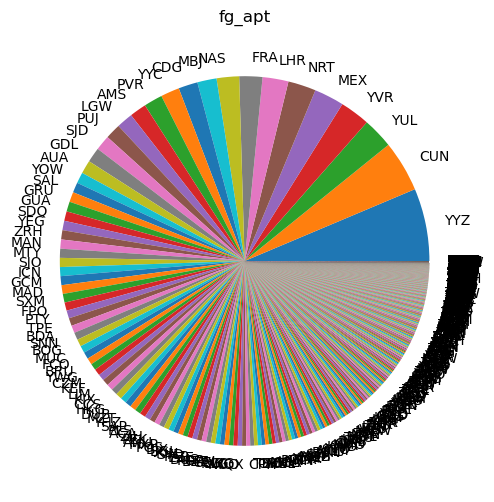

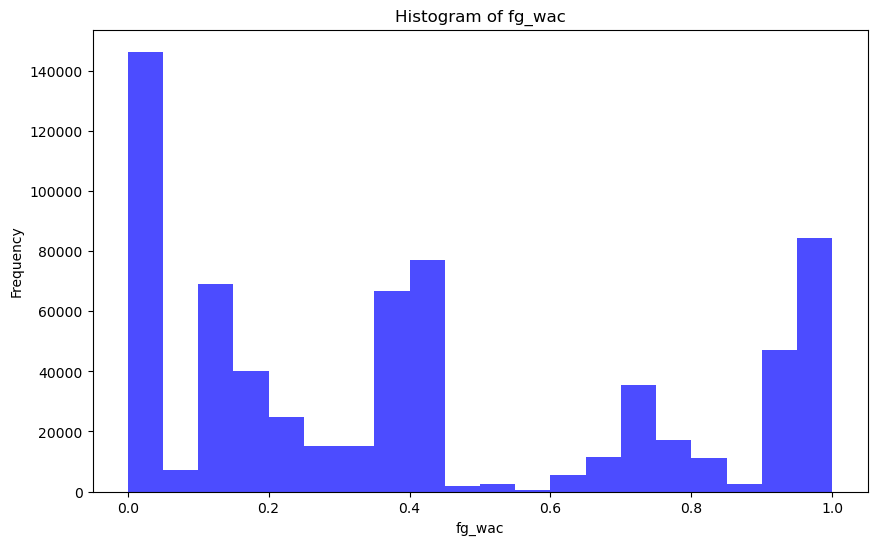

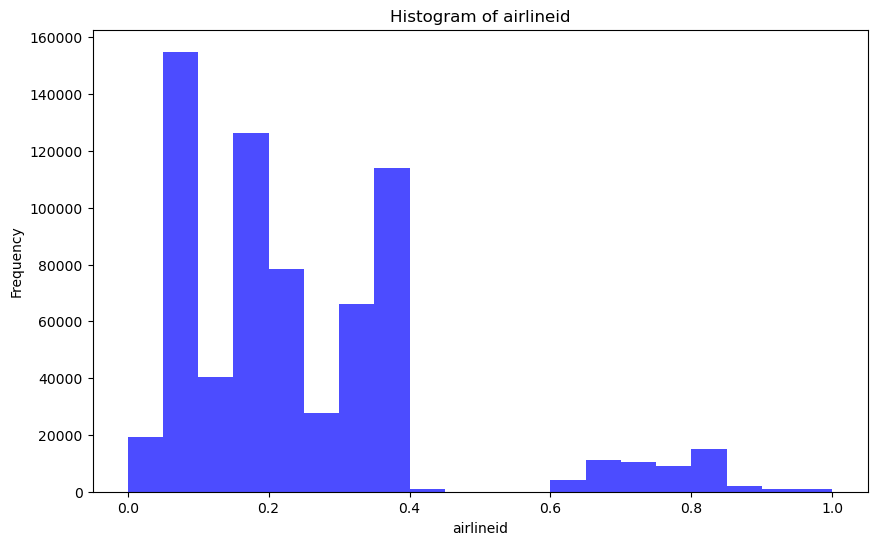

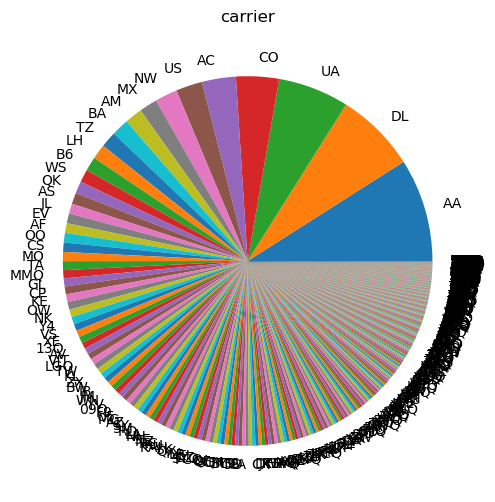

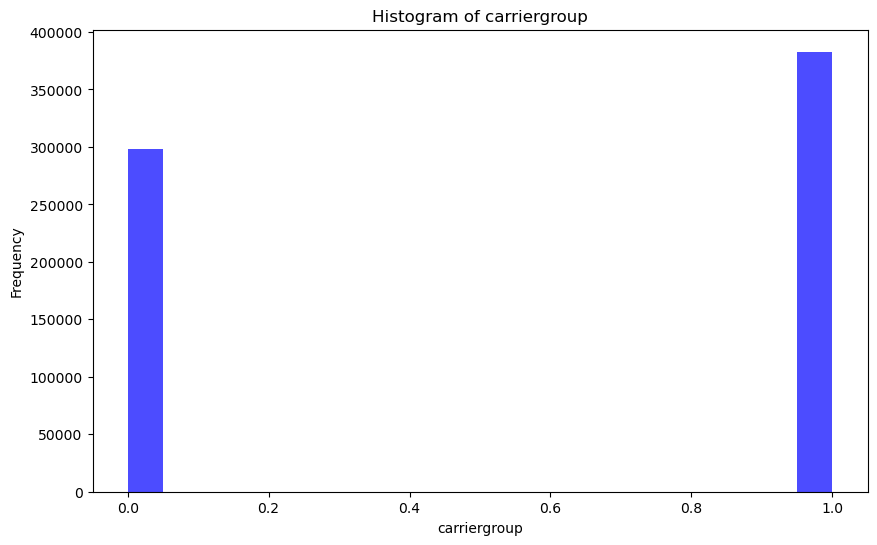

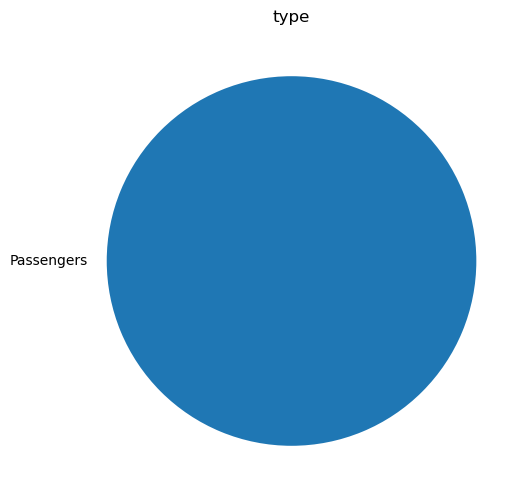

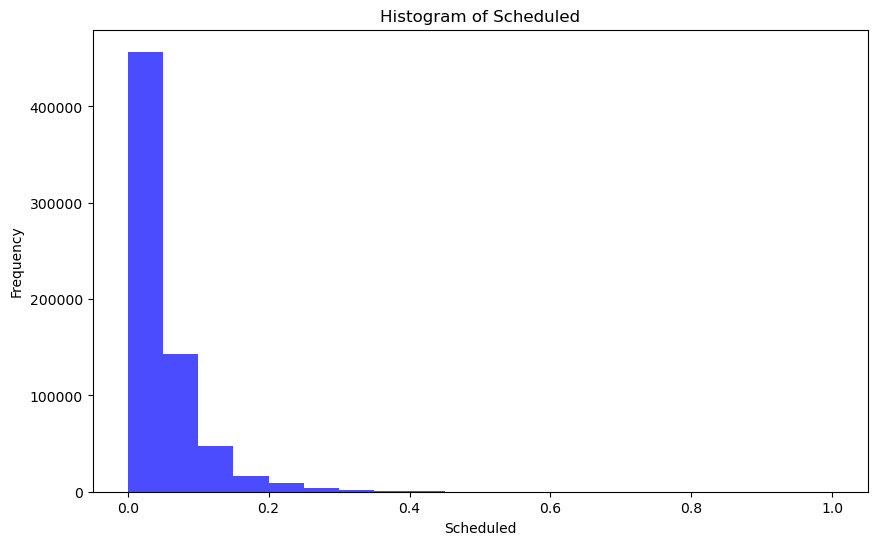

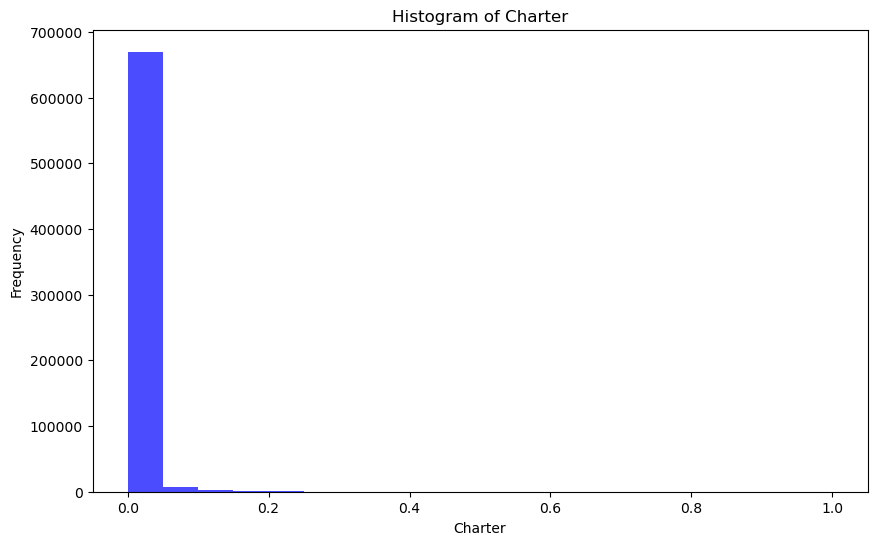

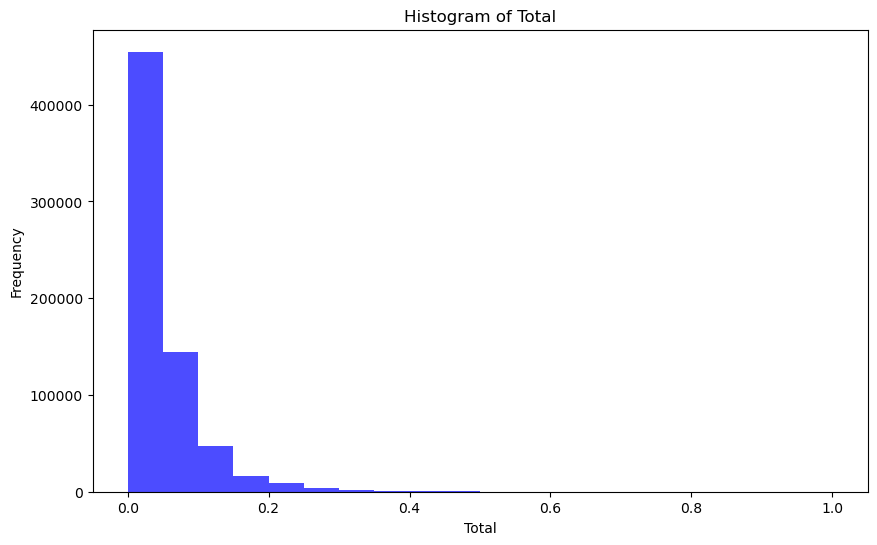

If u want to visulize your data using histogram type h, pie chart type p, scatter type s h
enter column nameMonth
enter bins number12
enter color namered
enter alpha value0.8


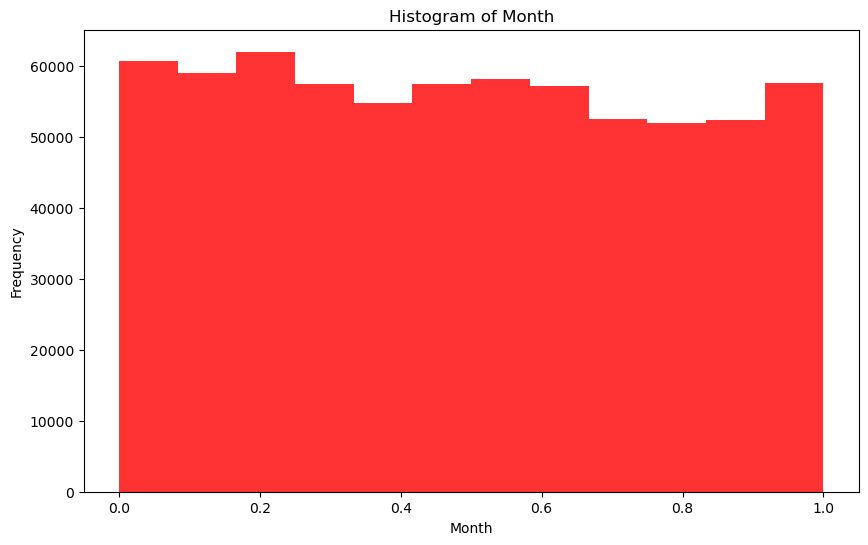

If u want to visulize your data using histogram type h, pie chart type p, scatter type s s
give x columnYear
give y columnusg_apt


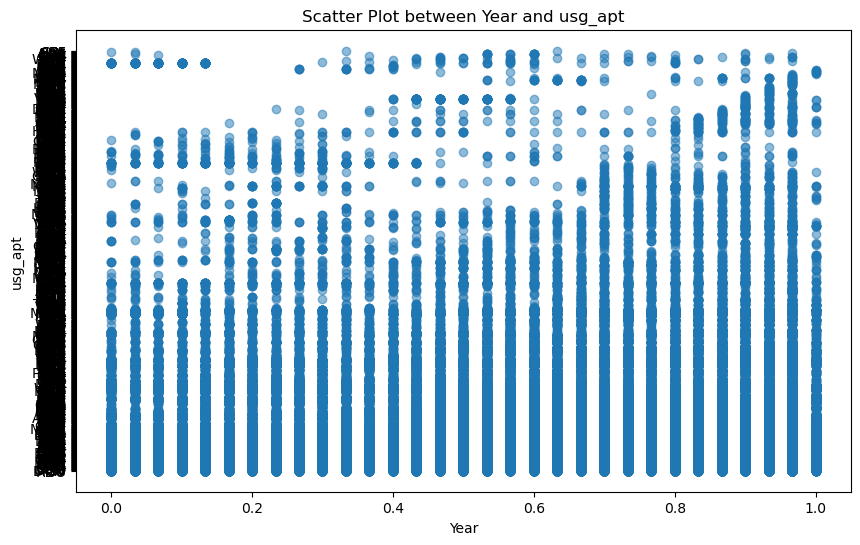

In [ ]:
path = input("Enter your file path")
ex = get_file_type(path)
df = read_file(path , ex)
print("Your dataframe : ")
print(df)
#C:\\Users\\ELITEBOOK\\Downloads\\archive\\International_Report_Passengers.csv
print("Before processing data : ")
print("isna : " , df.isna().sum())
print("duplicates" , df.duplicated())
print("Column type" , df.dtypes)

new_df = preprocess_data(df)

print("After processing data : ")
print(new_df)
print("isna : " , new_df.isna().sum())
print("duplicates" , new_df.duplicated())
print("Column type" , df.dtypes)

print("Columns visulization: ")
visulize_columns_according_to_type(new_df)  
   

while True :
    type = input("If u want to visulize your data using histogram type h, pie chart type p, scatter type s ")
    if(type == 'h') :
        col = input('enter column name')
        bins = int(input('enter bins number'))
        color = input('enter color name')
        alpha = float(input('enter alpha value'))
        visualize_histogram(df[col] , col , bins , color , alpha)
        
    elif(type == 'p') :
        col = input('enter column name')
        visualize_pie_chart_plot(df[col] , col)
    elif(type == 's') :
        x = input('give x column')
        y = input('give y column')
        visualize_scatter_plot(df[x], df[y] , x, y)
        